# **Places worldwide where Brazilians are most likely to live in**

### *Applied Data Science Capstone (IBM/Coursera) - Final Assignment*

<hr>

## How is Brazilian community worldly distributed

##### Extracting data from a Wikipedia webpage (https://en.wikipedia.org/wiki/Brazilian_diaspora) that contains a table with information about the number of brazilians living abroad and where do they live in.

### Scraping data

#### Importing libraries

##### In order to scrape that website the libraries *urllib* and _BeautifulSoup **(bs4)**_ will be used.

In [ ]:
# Installing bs4 package
# !conda install -c anaconda beautifulsoup4 --yes
# !conda install -c anaconda lxml --yes

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

#### Downloading the web page

##### The HTML Document will be requested from web.

In [3]:
url = 'https://en.wikipedia.org/wiki/Brazilian_diaspora'
page_world = urlopen(url) 
page_world

#### Parsing HTML

##### HTML Document downloaded above will be parsed to BeautifulSoup instance.

In [4]:
bs_world = BeautifulSoup(page_world, 'lxml')

##### Now that's better to look for the desired table and it was found to be _\<table class="infobox vcard"\>_

##### Next step is to get that table only.

In [5]:
table_world = bs_world.find('table', {"class": "infobox vcard"})

##### Removing the reference links from the table

In [6]:
for link in range(len(table_world.find_all('sup'))):
    table_world.find('sup').decompose()

##### Creating lists to store our data

In [7]:
pop = list()
country = list()

trs = table_world.find_all('tr')

##### Creating function for accessing data from rows.

In [8]:
def get_row_data(tr, tag, start=0, stop=len(trs)):      
        return [td.get_text(strip=True) for td in tr.find_all(tag)[start:stop]]

##### Getting data into lists.

In [9]:
for tr in trs[4:]:
    pop.append(get_row_data(tr, 'td'))
    country.append(get_row_data(tr, 'a'))
    
pop = pop[:24]
country = country[:24]
print("Population row: ", pop[:5])
print("Country row: ", country[:5])

Population row:  [['1,100,000'], ['275,000'], ['201,527'], ['200,000'], ['140,426']]
Country row:  [['United States'], ['Japan'], ['Paraguay'], ['United Kingdom'], ['Portugal']]


##### Creating dataframe from the clean table

In [10]:
import pandas as pd

In [11]:
df_pop = pd.DataFrame({'Country': country, 'Population': pop})
df_pop.head()

,Country,Population
0,[United States],"[1,100,000]"
1,[Japan],"[275,000]"
2,[Paraguay],"[201,527]"
3,[United Kingdom],"[200,000]"
4,[Portugal],"[140,426]"


##### Removing brackets from dataframe

In [12]:
df_pop['Country'] = df_pop['Country'].str.get(0)
df_pop['Population'] = df_pop['Population'].str.get(0)

##### Converting Population to _int_

In [13]:
df_pop['Population'] = df_pop['Population'].str.replace(',', '').astype(int)
df_pop.dtypes

Country       object
Population     int64
dtype: object

##### In order to better visualize in the plot, the dataframes will be reordered

In [14]:
df_pop = df_pop.loc[::-1,:]
df_pop.head()

,Country,Population
23,Qatar,800
22,Ghana,5000
21,Israel,10040
20,Sweden,10159
19,Angola,10649


#### Partial visualization

##### Putting into a bar chart in order to better visualize the numbers

In [15]:
import matplotlib.pyplot as plt

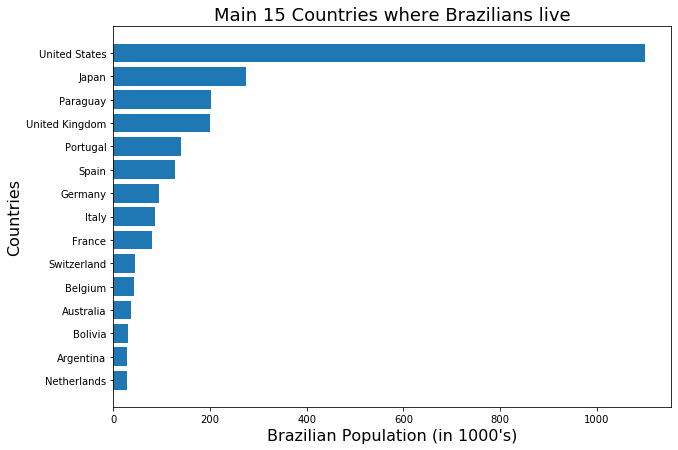

In [16]:
x = df_pop['Country'].tail(15)
y = (df_pop['Population'].tail(15))/1000

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.ylabel('Countries', fontsize = 16)
plt.xlabel("Brazilian Population (in 1000's)", fontsize = 16)
plt.title("Main 15 Countries where Brazilians live", fontsize = 18)
plt.show()

#### **Note**: Since the USA is undoubtedly the country with most born Brazilians living abroad, if someone wants to feel familiar in a new country and yet is not comfortable enough for going deep into another culture it's a nice start to move to a place where it is not hard to find any support on one's mother language and/or someone to have a conversation if needed specially for those who are going abroad for the first time.

#### Having that said, the focus now should be in _the USA_.

## Brazilian community in US

##### Extracting data from a City-Data webpage (http://www.city-data.com/top2/h153.html) that contains a table with information about the number of born brazilians living in US cities.

#### Scraping data

In [17]:
url2 = 'http://www.city-data.com/top2/h153.html'
page_usa = urlopen(url2)
page_usa

#### Parsing HTML

##### HTML Document downloaded above will be parsed to BeautifulSoup instance.

In [18]:
bs_usa = BeautifulSoup(page_usa, 'lxml')

##### Let's look for the desired table and it was found to be _\<table class="tabBlue tblsort tblsticky"\>_

##### Next step is to get that table only.

In [19]:
table_usa = bs_usa.find('table', {'class': 'tabBlue tblsort tblsticky'})

##### Getting data into lists.

In [20]:
pop_100 = list()
pop_city = list()
city = list()
trs_ = table_usa.find_all('tr')

for tr in trs_[2:]:
    pop_100.append(get_row_data(tr, 'td', start=2))
    city.append(get_row_data(tr, 'a', start=1, stop=2))
    
print("Population percentage row: ", pop_100[:5])
print("City row: ", city[:5])

Population percentage row:  [['14.9%'], ['12.1%'], ['11.0%'], ['9.0%'], ['8.4%']]
City row:  [['Loch Lomond, FL'], ['Avalon, FL'], ['Everett, MA'], ['Framingham, MA'], ['Long Branch, NJ']]


##### Removing the reference links from the table to make it easier to get city population data

In [21]:
for link in range(len(table_usa.find_all('a'))):
    table_usa.find('a').decompose()

##### Getting city population data after links have been removed

In [22]:
pop_city = list()

for tr in trs_[2:]:
    pop_city.append(get_row_data(tr, 'td', start=1, stop=2))
    
print("Population percentage row: ", pop_city[:5])


Population percentage row:  [['() (pop. 3,786)'], ['() (pop. 679)'], ['() (pop. 42,935)'], ['() (pop. 68,318)'], ['() (pop. 30,390)']]


#### Dataframe organizing

##### Creating dataframe 

In [23]:
df_usa = pd.DataFrame({'City Name': city, 'City Population': pop_city, 'Percentage': pop_100})
df_usa.head()

,City Name,City Population,Percentage
0,"[Loch Lomond, FL]","[() (pop. 3,786)]",[14.9%]
1,"[Avalon, FL]",[() (pop. 679)],[12.1%]
2,"[Everett, MA]","[() (pop. 42,935)]",[11.0%]
3,"[Framingham, MA]","[() (pop. 68,318)]",[9.0%]
4,"[Long Branch, NJ]","[() (pop. 30,390)]",[8.4%]


##### Removing brackets

In [24]:
df_usa['City Name'] = df_usa['City Name'].str.get(0)
df_usa['City Population'] = df_usa['City Population'].str.get(0)
df_usa['Percentage'] = df_usa['Percentage'].str.get(0)

In [25]:
df_usa.head()

,City Name,City Population,Percentage
0,"Loch Lomond, FL","() (pop. 3,786)",14.9%
1,"Avalon, FL",() (pop. 679),12.1%
2,"Everett, MA","() (pop. 42,935)",11.0%
3,"Framingham, MA","() (pop. 68,318)",9.0%
4,"Long Branch, NJ","() (pop. 30,390)",8.4%


##### Treating _City Population_ column from the dataframe

In [26]:
df_usa['City Population']=df_usa['City Population'].str.replace('(', '')
df_usa['City Population']=df_usa['City Population'].str.replace(')', '')
df_usa['City Population']=df_usa['City Population'].str.replace('pop.', '')
df_usa['City Population']=df_usa['City Population'].str.replace(',', '').astype(int)
df_usa.head()  

,City Name,City Population,Percentage
0,"Loch Lomond, FL",3786,14.9%
1,"Avalon, FL",679,12.1%
2,"Everett, MA",42935,11.0%
3,"Framingham, MA",68318,9.0%
4,"Long Branch, NJ",30390,8.4%


##### Treating _Percentage_ column from the dataframe

In [27]:
df_usa['Percentage']=df_usa['Percentage'].str.replace('%', '').astype(float)
df_usa.head()  

,City Name,City Population,Percentage
0,"Loch Lomond, FL",3786,14.9
1,"Avalon, FL",679,12.1
2,"Everett, MA",42935,11.0
3,"Framingham, MA",68318,9.0
4,"Long Branch, NJ",30390,8.4


In [28]:
df_usa.dtypes

City Name           object
City Population      int64
Percentage         float64
dtype: object

##### Creating a new column containing the approximated number of Brazilians living in each city

In [29]:
df_usa['#Brazilians'] = round(df_usa['City Population'] * (df_usa['Percentage']/100.0)).astype(int)
df_usa.head()

,City Name,City Population,Percentage,#Brazilians
0,"Loch Lomond, FL",3786,14.9,564
1,"Avalon, FL",679,12.1,82
2,"Everett, MA",42935,11.0,4723
3,"Framingham, MA",68318,9.0,6149
4,"Long Branch, NJ",30390,8.4,2553


#### Choosing City

##### Ordering by city population among cities within the list

In [30]:
df_brz = df_usa.sort_values(by='City Population', ascending=False).reset_index(drop=True)
df_brz.head()

,City Name,City Population,Percentage,#Brazilians
0,"Newark, NJ",278427,3.2,8910
1,"Bridgeport, CT",147216,2.3,3386
2,"Lowell, MA",108861,2.5,2722
3,"Pompano Beach, FL",104410,2.3,2401
4,"Danbury, CT",83684,6.4,5356


##### Visualizing it better

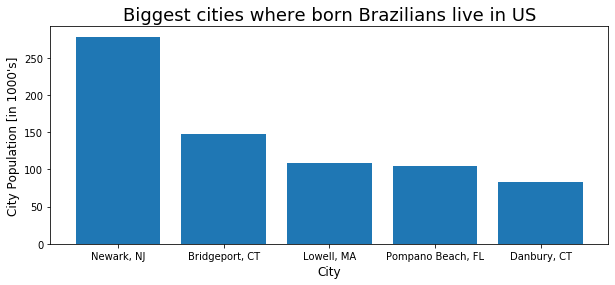

In [31]:
x = df_brz['City Name'].head()
y = df_brz['City Population'].head()/1000

plt.figure(figsize=(10,4))
plt.bar(x, y)
plt.xlabel('City', fontsize = 12)
plt.ylabel("City Population [in 1000's]", fontsize = 12)
plt.title("Biggest cities where born Brazilians live in US", fontsize = 18)
plt.show()

##### Ordering by number of Brazilian people living in the cities within the list

In [32]:
df_brz2 = df_usa.sort_values(by='#Brazilians', ascending=False).reset_index(drop=True)
df_brz2.head()

,City Name,City Population,Percentage,#Brazilians
0,"Newark, NJ",278427,3.2,8910
1,"Framingham, MA",68318,9.0,6149
2,"Deerfield Beach, FL",78041,7.0,5463
3,"Danbury, CT",83684,6.4,5356
4,"Everett, MA",42935,11.0,4723


##### Visualizing it better

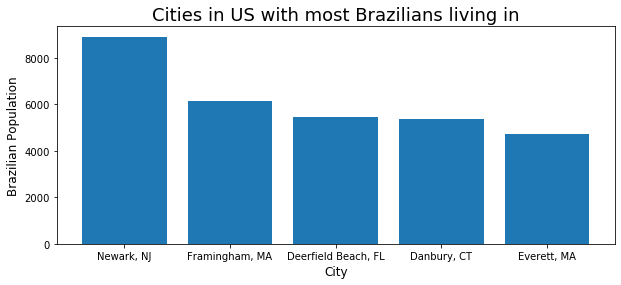

In [33]:
x = df_brz2['City Name'].head()
y = df_brz2['#Brazilians'].head()

plt.figure(figsize=(10,4))
plt.bar(x, y)
plt.xlabel('City', fontsize = 12)
plt.ylabel('Brazilian Population', fontsize = 12)
plt.title("Cities in US with most Brazilians living in", fontsize = 18)
plt.show()

#### **Note:** It appears to have a great number of Brazilians living in certain two cities as well as they are not too small cities (neither too big cities). Those are _Newark, NJ_ and _Danbury, CT_. The first one has around 280,000 people living in it whilst the second one has around a third of it. As it is a matter of the person's interests about living in a bigger or smaller city both will be discussed from now on. 

#### The first one will be _Danbury, CT_

## City: Danbury, CT

### Gathering information about places related to Brazil in the city of Danbury

#### Getting city's coordinates

##### The _geopy_ library will be used to get the cities' coordinates on this notebook

In [ ]:
# Installing geopy
# !conda install -c conda-forge geopy --yes

In [35]:
from geopy.geocoders import Nominatim
print("Geopy imported!")

Geopy imported!


In [36]:
locate = Nominatim(user_agent="my_app")
loc_danbury = locate.geocode("Danbury, CT")
print("Danbury latitude: " , loc_danbury.latitude, "\nDanbury longtitude: " ,loc_danbury.longitude)

Danbury latitude:  41.394817 
Danbury longtitude:  -73.4540111


##### Setting variables for Danbury's Latitude and Longitude

In [37]:
dan_lat = loc_danbury.latitude
dan_lon = loc_danbury.longitude

#### Using Foursquare API 

##### Setting up query and credentials

In [38]:
search_query = 'brazilian'
radius = 7000
CLIENT_ID = 'G4GBDV14K54YLSHYVEJZ5QEN4GERHVNPRX20PT0EAHFMGTA4' # your Foursquare ID
CLIENT_SECRET = 'ITXUTVTS2ERZQJZXURTQJCTKJ1ZW3H33WWE23NOIGKGMJSCJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50

url_fs = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, dan_lat, dan_lon, VERSION, search_query, radius, LIMIT)

##### Getting the results

In [39]:
import requests
from pandas.io.json import json_normalize

In [40]:
results = requests.get(url_fs).json()

##### Separating relevant data

In [41]:
danbury_venues = results['response']['venues']

dataframe = pd.json_normalize(danbury_venues)
dataframe

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress
0,4e3aef0db0fbca6e84badb72,Brazilian Point,"[{'id': '4bf58dd8d48988d16b941735', 'name': 'B...",v-1587847296,False,16 Ives St,41.396499,-73.453093,"[{'label': 'display', 'lat': 41.39649919504783...",202,06810,US,Danbury,CT,United States,"[16 Ives St, Danbury, CT 06810, United States]"
1,545ebbad498e963255ad5307,Brazilian Catholic Community,"[{'id': '5032792091d4c4b30a586d5c', 'name': 'C...",v-1587847296,False,NaN,41.394066,-73.448270,"[{'label': 'display', 'lat': 41.394066, 'lng':...",486,NaN,US,Danbury,CT,United States,"[Danbury, CT, United States]"
2,4e223f691838712abe7b9ee0,Brazilian Cultural Center,"[{'id': '52e81612bcbc57f1066b7a32', 'name': 'C...",v-1587847296,False,NaN,41.394144,-73.447882,"[{'label': 'display', 'lat': 41.394144, 'lng':...",517,NaN,US,Danbury,CT,United States,"[Danbury, CT, United States]"
3,564fc8fc498ed07433fd7270,Planeta Brazil - Brazilian Steakhouse,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",v-1587847296,False,48 Newtown Rd,41.403306,-73.424096,"[{'label': 'display', 'lat': 41.40330648388892...",2670,06810,US,Danbury,CT,United States,"[48 Newtown Rd, Danbury, CT 06810, United States]"
4,4df36dabc65bf55ee52b9c88,Luso-Brazilian Seventh-day Adventist,"[{'id': '4bf58dd8d48988d132941735', 'name': 'C...",v-1587847296,False,239 Greenwood Ave,41.372477,-73.419307,"[{'label': 'display', 'lat': 41.372477, 'lng':...",3819,06801,US,Bethel,CT,United States,"[239 Greenwood Ave, Bethel, CT 06801, United S..."


##### Selecting fields of interest for location

In [42]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_filtered['categories'] = df_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_filtered.columns = [column.split('.')[-1] for column in df_filtered.columns]

df_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Brazilian Point,Brazilian Restaurant,16 Ives St,41.396499,-73.453093,"[{'label': 'display', 'lat': 41.39649919504783...",202,06810,US,Danbury,CT,United States,"[16 Ives St, Danbury, CT 06810, United States]",4e3aef0db0fbca6e84badb72
1,Brazilian Catholic Community,Concert Hall,NaN,41.394066,-73.448270,"[{'label': 'display', 'lat': 41.394066, 'lng':...",486,NaN,US,Danbury,CT,United States,"[Danbury, CT, United States]",545ebbad498e963255ad5307
2,Brazilian Cultural Center,Cultural Center,NaN,41.394144,-73.447882,"[{'label': 'display', 'lat': 41.394144, 'lng':...",517,NaN,US,Danbury,CT,United States,"[Danbury, CT, United States]",4e223f691838712abe7b9ee0
3,Planeta Brazil - Brazilian Steakhouse,Steakhouse,48 Newtown Rd,41.403306,-73.424096,"[{'label': 'display', 'lat': 41.40330648388892...",2670,06810,US,Danbury,CT,United States,"[48 Newtown Rd, Danbury, CT 06810, United States]",564fc8fc498ed07433fd7270
4,Luso-Brazilian Seventh-day Adventist,Church,239 Greenwood Ave,41.372477,-73.419307,"[{'label': 'display', 'lat': 41.372477, 'lng':...",3819,06801,US,Bethel,CT,United States,"[239 Greenwood Ave, Bethel, CT 06801, United S...",4df36dabc65bf55ee52b9c88


### Putting into a map

#### Creating a map

##### _Folium_ library will be used to create and manipulate maps

In [43]:
import folium

In [44]:
map_danbury = folium.Map(location = [dan_lat, dan_lon], zoom_start=13)

##### Adding markers to the map

In [45]:
for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0
    ).add_to(map_danbury)

map_danbury

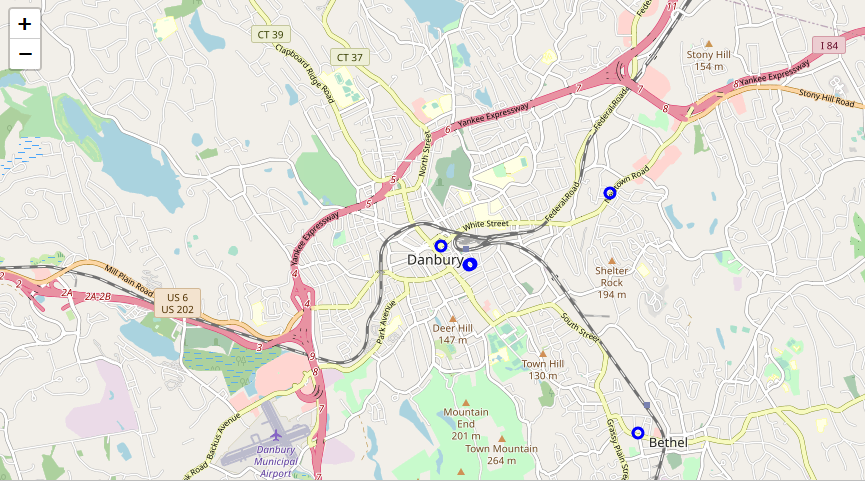

In [46]:
# Screenshot of the map created above
from IPython.display import Image
Image("danbury_venues.PNG")

#### Clustering the spots

##### Let's use the _KMeans_ from _sklearn.cluster_ module.

In [47]:
from sklearn.cluster import KMeans 

In [48]:
df_dan = pd.DataFrame(df_filtered, columns=['lat', 'lng'])
df_dan.head()

,lat,lng
0,41.396499,-73.453093
1,41.394066,-73.448270
2,41.394144,-73.447882
3,41.403306,-73.424096
4,41.372477,-73.419307


##### Printing clusters' centroids and labels

In [49]:
kmeans = KMeans(n_clusters=3).fit(df_dan)
centroids = kmeans.cluster_centers_
df_centroids = pd.DataFrame(centroids, columns=['Latitude', 'Longitude'])
df_centroids

,Latitude,Longitude
0,41.394903,-73.449748
1,41.372477,-73.419307
2,41.403306,-73.424096


In [50]:
df_clabels = pd.DataFrame(kmeans.labels_, columns=['Labels'])
df_clabels

,Labels
0,0
1,0
2,0
3,2
4,1


##### Setting radius scheme

In [51]:
dan_radius = df_clabels['Labels'].value_counts().to_frame('Radius')
dan_radius = dan_radius*500
dan_radius

,Radius
0,1500
2,500
1,500


##### Adding markers to centroids on map

In [52]:
for lat, lng, label, rad in zip(df_centroids.Latitude, df_centroids.Longitude, df_clabels.Labels, dan_radius.Radius):
    folium.Circle(
        [lat, lng],
        popup=folium.Popup(label),
        radius=rad,
        color='red',
        fill = True,
        fill_color='red',
        fill_opacity=0.2
    ).add_to(map_danbury)

map_danbury

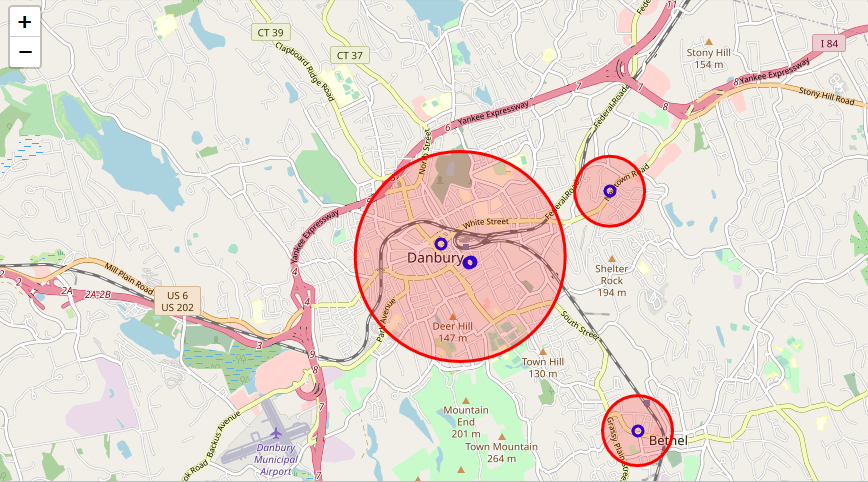

In [63]:
# Screenshot of the map created above
# from IPython.display import Image
Image("danbury_clusters.PNG")

#### **Note:** In the map are highlighted areas where newcomer Brazilians are **most likely** to be more comfortable or feel more familiar with at least at first sight in **Danbury, CT** (and nearby) due to Brazil-related places like restaurants and Catholic community

#### May now _Newark, NJ_ be next to be analyzed

## City: Newark, NJ

### Gathering information about places related to Brazil in the city of Newark

#### Getting city's coordinates

In [53]:
locate = Nominatim(user_agent="my_app")
loc_newark = locate.geocode("Newark, NJ")
print("Newark latitude: " , loc_newark.latitude, "\nNewark longtitude: " ,loc_newark.longitude)

Newark latitude:  40.735657 
Newark longtitude:  -74.1723667


##### Setting variables for Newark's Latitude and Longitude

In [54]:
nak_lat = loc_newark.latitude
nak_lon = loc_newark.longitude

#### Using Foursquare API 

##### Setting up query and credentials

In [55]:
search_query = 'brazilian'
radius = 7000
CLIENT_ID = 'G4GBDV14K54YLSHYVEJZ5QEN4GERHVNPRX20PT0EAHFMGTA4' # your Foursquare ID
CLIENT_SECRET = 'ITXUTVTS2ERZQJZXURTQJCTKJ1ZW3H33WWE23NOIGKGMJSCJ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50

url_fs2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, nak_lat, nak_lon, VERSION, search_query, radius, LIMIT)

##### Getting the results

In [56]:
results2 = requests.get(url_fs2).json()

##### Separating relevant data

In [57]:
newark_venues = results2['response']['venues']

dataframe2 = pd.json_normalize(newark_venues)
dataframe2.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.formattedAddress,venuePage.id,location.neighborhood,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.crossStreet
0,4de11dbf45dd3eae877f20e9,Brazilian Beauty SPA & Salon,"[{'id': '54541900498ea6ccd0202697', 'name': 'H...",v-1587848768,False,27 1/2 Merchant St,40.728821,-74.154849,"[{'label': 'display', 'lat': 40.72882090653800...",1662,...,"[27 1/2 Merchant St, Newark, NJ 07105, United ...",338059520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51489b03e4b04983dbf76920,Brazilian Smoke,"[{'id': '4bf58dd8d48988d123951735', 'name': 'S...",v-1587848768,False,NaN,40.734957,-74.167512,"[{'label': 'display', 'lat': 40.734957, 'lng':...",416,...,"[Newark, NJ, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4d6c266b79476dcbdd358568,Brazilian Bakery,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",v-1587848768,False,44 Ferry St #B,40.733065,-74.163446,"[{'label': 'display', 'lat': 40.733065, 'lng':...",805,...,"[44 Ferry St #B, Newark, NJ 07105, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5e279934dead070008a3a01d,Brazilian Cultural Center Of Newark,"[{'id': '4bf58dd8d48988d101941735', 'name': 'M...",v-1587848768,False,NaN,40.718866,-74.154917,"[{'label': 'display', 'lat': 40.718866, 'lng':...",2379,...,"[Newark, NJ 07105, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4f1de1a3e4b03543a3d3176d,Brazilian Smoke Shop,"[{'id': '4bf58dd8d48988d123951735', 'name': 'S...",v-1587848768,False,97 Ferry Street,40.730683,-74.161370,"[{'label': 'display', 'lat': 40.730683, 'lng':...",1080,...,"[97 Ferry Street, Newark, NJ 07105, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
dataframe2.shape

(31, 25)

##### Selecting fields of interest for location

In [59]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns2 = ['name', 'categories'] + [col2 for col2 in dataframe2.columns if col2.startswith('location.')] + ['id']
df_filtered2 = dataframe2.loc[:, filtered_columns2]

# function that extracts the category of the venue
def get_category_type(row2):
    try:
        categories_list2 = row2['categories']
    except:
        categories_list2 = row2['venue.categories']
        
    if len(categories_list2) == 0:
        return None
    else:
        return categories_list2[0]['name']

# filter the category for each row
df_filtered2['categories'] = df_filtered2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_filtered2.columns = [column2.split('.')[-1] for column2 in df_filtered2.columns]

df_filtered2.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,crossStreet,id
0,Brazilian Beauty SPA & Salon,Health & Beauty Service,27 1/2 Merchant St,40.728821,-74.154849,"[{'label': 'display', 'lat': 40.72882090653800...",1662,07105,US,Newark,NJ,United States,"[27 1/2 Merchant St, Newark, NJ 07105, United ...",NaN,NaN,4de11dbf45dd3eae877f20e9
1,Brazilian Smoke,Smoke Shop,NaN,40.734957,-74.167512,"[{'label': 'display', 'lat': 40.734957, 'lng':...",416,NaN,US,Newark,NJ,United States,"[Newark, NJ, United States]",NaN,NaN,51489b03e4b04983dbf76920
2,Brazilian Bakery,Bakery,44 Ferry St #B,40.733065,-74.163446,"[{'label': 'display', 'lat': 40.733065, 'lng':...",805,07105,US,Newark,NJ,United States,"[44 Ferry St #B, Newark, NJ 07105, United States]",NaN,NaN,4d6c266b79476dcbdd358568
3,Brazilian Cultural Center Of Newark,Martial Arts Dojo,NaN,40.718866,-74.154917,"[{'label': 'display', 'lat': 40.718866, 'lng':...",2379,07105,US,Newark,NJ,United States,"[Newark, NJ 07105, United States]",NaN,NaN,5e279934dead070008a3a01d
4,Brazilian Smoke Shop,Smoke Shop,97 Ferry Street,40.730683,-74.161370,"[{'label': 'display', 'lat': 40.730683, 'lng':...",1080,07105,US,Newark,NJ,United States,"[97 Ferry Street, Newark, NJ 07105, United Sta...",NaN,NaN,4f1de1a3e4b03543a3d3176d


### Putting into a map

#### Creating a map

In [60]:
map_newark = folium.Map(location = [nak_lat, nak_lon], zoom_start=11)

##### Adding markers to the map

In [61]:
for lat, lng, label in zip(df_filtered2.lat, df_filtered2.lng, df_filtered2.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0
    ).add_to(map_newark)

map_newark

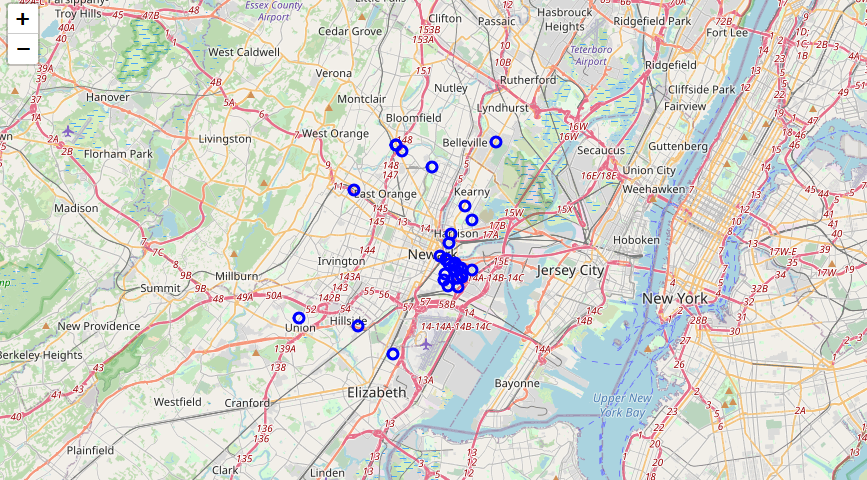

In [62]:
# Screenshot of the map created above
# from IPython.display import Image
Image("newark_venues.PNG")

#### Clustering the spots

In [64]:
df_nak = pd.DataFrame(df_filtered2, columns=['lat', 'lng'])
df_nak.head()

,lat,lng
0,40.728821,-74.154849
1,40.734957,-74.167512
2,40.733065,-74.163446
3,40.718866,-74.154917
4,40.730683,-74.161370


##### Printing clusters' centroids and labels

In [65]:
kmeans2 = KMeans(n_clusters=3).fit(df_nak)
centroids2 = kmeans2.cluster_centers_
df_centroids2 = pd.DataFrame(centroids2, columns=['Latitude', 'Longitude'])
df_centroids2

,Latitude,Longitude
0,40.731305,-74.157126
1,40.786503,-74.185941
2,40.694778,-74.228967


In [66]:
df_clabels2 = pd.DataFrame(kmeans2.labels_, columns=['Labels'])
df_clabels2.head()

,Labels
0,0
1,0
2,0
3,0
4,0


##### Adding markers to centroids on map

In [67]:
for lat, lng, label in zip(df_centroids2.Latitude, df_centroids2.Longitude, df_clabels2.Labels):
    folium.Circle(
        [lat, lng],
        popup=folium.Popup(label),
        radius=5000,
        color='red',
        fill = True,
        fill_color='red',
        fill_opacity=0.2
    ).add_to(map_newark)

map_newark

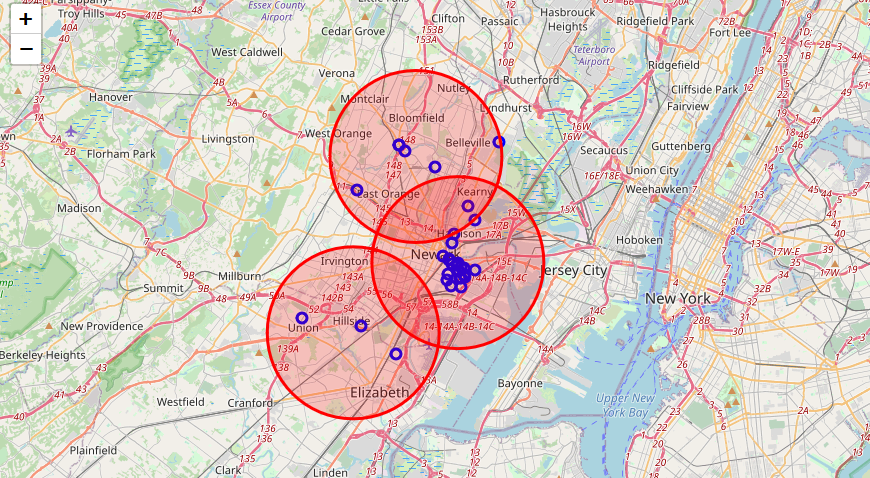

In [68]:
# Screenshot of the map created above
# from IPython.display import Image
Image("newark_clusters.PNG")

#### **Note:** In the map are highlighted areas where newcomer Brazilians are **most likely** to be more comfortable or feel more familiar with at least at first sight in **Newark, NJ** (and nearby) due to Brazil-related places like restaurants, bakeries and cultural centers

## **(Extra)** What else? Major cities nearby

##### As an extra content that might help someone to decide where is it going to be one's new home is to know which famous or economic large cities are settled nearby.

In [184]:
# Chosen cities
cities = ['Philadelphia, PA', 'New York, NY', 'Boston, MA', 'Washington, DC', 'Baltimore, MD', 'Toronto, Canada']

#### Getting cities coordinates

In [185]:
cities_lat = list()
cities_lon = list()

for city in cities:
    locate = Nominatim(user_agent="my_app")
    loc_city = locate.geocode(city)
    
    cities_lat.append(loc_city.latitude)
    cities_lon.append(loc_city.longitude)

print('Latidudes: ', cities_lat)
print('Longitudes: ', cities_lon)

Latidudes:  [39.9527237, 40.7127281, 42.3602534, 38.8949855, 39.2908816, 43.6534817]
Longitudes:  [-75.1635262, -74.0060152, -71.0582912, -77.0365708, -76.610759, -79.3839347]


#### Putting into a map

##### Setting the map centre which will be in the mean distance between the two cities of analysis

In [230]:
centre_lat = (dan_lat + nak_lat)/2
centre_lon = (dan_lon + nak_lon)/2

cities_map = folium.Map(
    location=[centre_lat, centre_lon], zoom_start=6,
    tiles='https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}{r}.png',
    attr='<a href="https://wikimediafoundation.org/wiki/Maps_Terms_of_Use">Wikimedia</a>',
    max_zoom=19
)

##### Adding markers

In [159]:
from folium.features import DivIcon

In [231]:
for lat, lng in zip(cities_lat, cities_lon):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='lightblue',
        fill_opacity=1
    ).add_to(cities_map)
    
folium.Marker(
    [dan_lat, dan_lon],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(-18,30),
        html='<div style="font-size: 12pt; color : black"><b>Danbury</b></div>',
        )
).add_to(cities_map)

folium.Marker(
    [nak_lat, nak_lon],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(72,30),
        html='<div style="font-size: 12pt; color : black"><b>Newark</b></div>',
        )
).add_to(cities_map)

folium.Marker(
    [dan_lat, dan_lon], popup = 'Danbury, CT',
    icon=folium.Icon(color='red')
).add_to(cities_map)

folium.Marker(
    [nak_lat, nak_lon], popup = 'Newark, NJ',
    icon=folium.Icon(color='red')
).add_to(cities_map)
cities_map

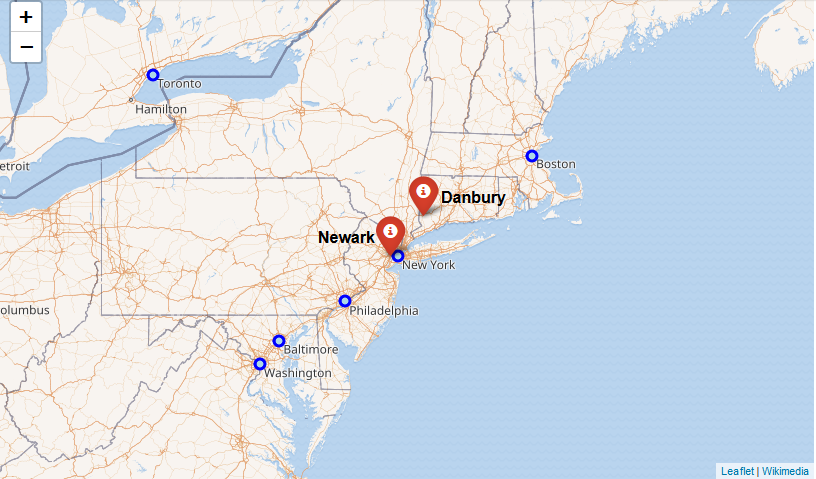

In [232]:
# Screenshot of the map created above
# from IPython.display import Image
Image("cities_map.PNG")

#### **Conclusion:** Given all those features hereby presented, it is up to the customer to decide whereto move in since it is a personal taste whether the size of a city matters or not to make this decision and, also, if the fact that the city is next to a great centre of the world economy is to be taken into consideration. For whichever the decision taken, these two options might be somehow helpful for the parameters hypothetically considered for what matters.

#### **Note:** This sort of prediction does not take into consideration the current living pandemic which the world is experiencing by the time that this report is being written or its effects on politics and economy around the world.